# MLP

In [1]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from model.architectures import MLP

## Create Data

In [2]:
f = lambda x: 1+2*x**2

N = 32
xs = (4*torch.rand(N)-2)[:,None]
ys = f(xs) + 0.01*torch.randn(N,1)
x = torch.linspace(-2,2,100)

dataset = TensorDataset(xs, ys)
data_loader = DataLoader(dataset, batch_size=N, shuffle=True)

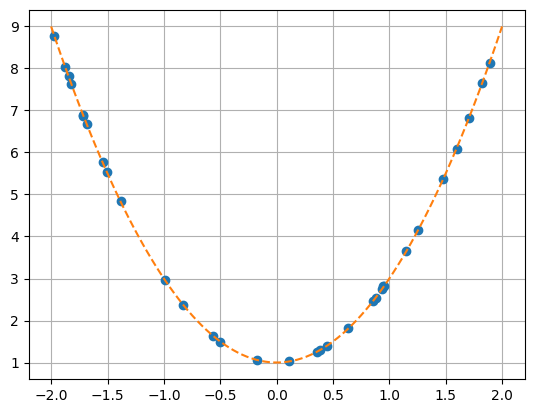

In [3]:
plt.plot(xs[:,0].detach().numpy(), ys[:,0].detach().numpy(), 'o',label='data')
plt.plot(x.detach().numpy(), f(x).detach().numpy(), '--',label='true')
plt.grid()
plt.show()

In [4]:
model = MLP(input_dim=1, hidden_dim=[64,64,64], output_dim=1)
loss_fn = nn.MSELoss()  
opt = torch.optim.SGD(model.parameters(), lr=0.01)

model.train()
losses = []
for epoch in range(1000):
    for xs, ys in data_loader:
        preds = model(xs)
        loss  = loss_fn(preds, ys)
        loss.backward()
        opt.step()
        opt.zero_grad()  

        losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 24.33283233642578
Epoch 10, Loss: 2.8674087524414062
Epoch 20, Loss: 1.984076738357544
Epoch 30, Loss: 1.3244601488113403
Epoch 40, Loss: 0.7927566170692444
Epoch 50, Loss: 0.43723806738853455
Epoch 60, Loss: 0.25025656819343567
Epoch 70, Loss: 0.15880465507507324
Epoch 80, Loss: 0.11407874524593353
Epoch 90, Loss: 0.09163448959589005
Epoch 100, Loss: 0.07936333119869232
Epoch 110, Loss: 0.07145427167415619
Epoch 120, Loss: 0.06532380729913712
Epoch 130, Loss: 0.060036949813365936
Epoch 140, Loss: 0.05513262748718262
Epoch 150, Loss: 0.0508437417447567
Epoch 160, Loss: 0.046989940106868744
Epoch 170, Loss: 0.043430931866168976
Epoch 180, Loss: 0.04030075669288635
Epoch 190, Loss: 0.03761407732963562
Epoch 200, Loss: 0.034756939858198166
Epoch 210, Loss: 0.032349053770303726
Epoch 220, Loss: 0.030015159398317337
Epoch 230, Loss: 0.02750062569975853
Epoch 240, Loss: 0.02531580813229084
Epoch 250, Loss: 0.023451220244169235
Epoch 260, Loss: 0.02189304307103157
Epoch 270, Lo

## Evaluate

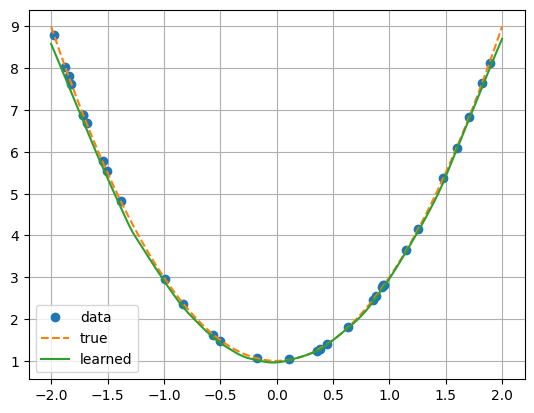

In [5]:
plt.plot(xs[:,0].detach().numpy(), ys[:,0].detach().numpy(), 'o',label='data')
plt.plot(x,f(x), '--',label='true')
plt.plot(x,model(x[:,None]).squeeze().detach().numpy(), '-',label='learned')
plt.legend()
plt.grid()
plt.show()